# Machine Learning Assignment 3
## By Maha Qaiser 22i-2348

- Implement a machine learning model using Gradient Descent and Regression techniques
(Linear/Logistic, Polynomial, etc.).
- Apply Regularization (L1/L2) to prevent overfitting.
- Implement Early Stopping to optimize performance.
- Train and evaluate the model using a relevant dataset.

In [23]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

In [24]:
from copy import deepcopy
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [25]:
# early stopping function

def early_stopping(model, X_train, y_train, X_val, y_val, patience=10, max_iter=200, batch=False):
    best_mse = float("inf")
    best_model = deepcopy(model)
    epochs_without_improvement = 0
    
    for epoch in range(max_iter):
        if batch: #if mini-batch model, perform partial_fit
            model.partial_fit(X_train, y_train)
        else:
            model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred) #validation mse

        if val_mse < best_mse:
            best_mse = val_mse
            best_model = deepcopy(model)
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        if epochs_without_improvement >= patience: # stop if no improvement after patience epochs
            print(f"early stopping at epoch {epoch+1}")
            break
            
    return best_model

In [26]:
# load and split the dataset
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target

# feature names
print(dataset.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a validation set for early stopping function
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# polynomial Features transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


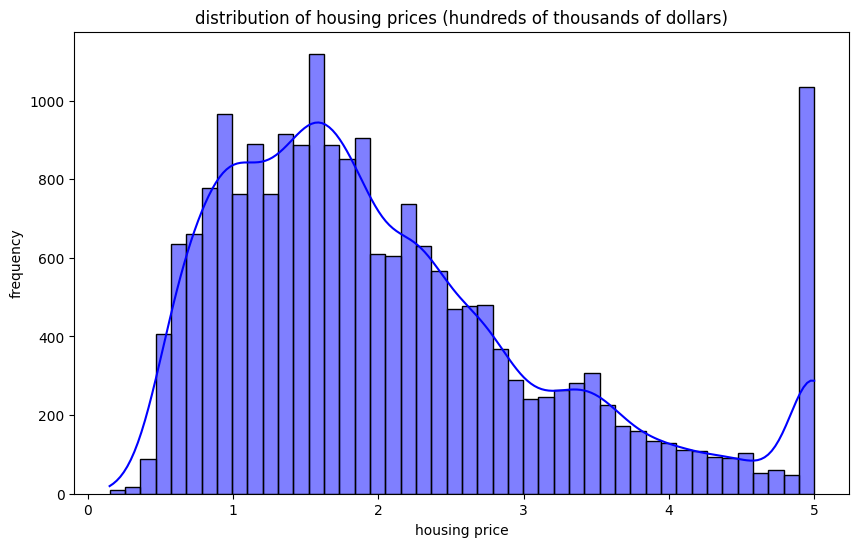

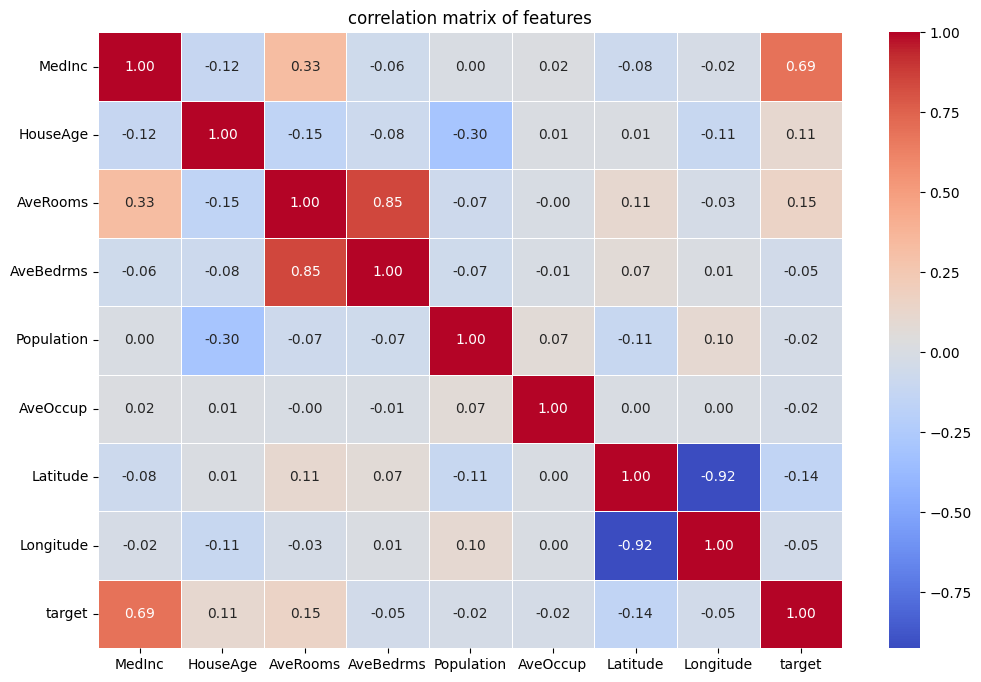

In [ ]:
# # dataset visualisation

# feature_names = dataset.feature_names

# df = pd.DataFrame(X, columns=feature_names)
# df['target'] = y

# # distribution of the target variable (house values)
# plt.figure(figsize=(10, 6))
# sns.histplot(df['target'], kde=True, color='blue')
# plt.title('distribution of housing prices (hundreds of thousands of dollars)')
# plt.xlabel('housing price')
# plt.ylabel('frequency')
# plt.show()

# # feature correlation matrix
# corr_matrix = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('correlation matrix of features')
# plt.show()

In [27]:
# batch gradient descent with lasso 
model_bgd1 = SGDRegressor(penalty='l1', learning_rate='constant', shuffle=False, eta0=0.01, max_iter=200, tol=1e-4, random_state=42)
model_bgd1_best = early_stopping(model_bgd1, X_train, y_train, X_val, y_val, patience=10, max_iter=200, batch=False)
y_pred_bgd1 = model_bgd1_best.predict(X_test)
print('batch gradient descent with lasso (l1) mse:', mean_squared_error(y_test, y_pred_bgd1))

# batch gradient descent with ridge 
model_bgd2 = SGDRegressor(penalty='l2', learning_rate='constant', shuffle=False, eta0=0.01, max_iter=200, tol=1e-4, random_state=42)
model_bgd2_best = early_stopping(model_bgd2, X_train, y_train, X_val, y_val, patience=10, max_iter=200, batch=False)
y_pred_bgd2 = model_bgd2_best.predict(X_test)
print('batch gradient descent with ridge (l2) mse:', mean_squared_error(y_test, y_pred_bgd2))

early stopping at epoch 11
batch gradient descent with lasso (l1) mse: 2.2929612834766822e+20
early stopping at epoch 11
batch gradient descent with ridge (l2) mse: 2.3526438709398644e+20


In [28]:
# stochastic gradient descent with lasso 
model_sgd1 = SGDRegressor(penalty='l1', learning_rate='invscaling', shuffle=True, eta0=0.01, max_iter=200, tol=1e-4, random_state=42)
model_sgd1_best = early_stopping(model_sgd1, X_train, y_train, X_val, y_val, patience=10, max_iter=200, batch=False)
y_pred_sgd1 = model_sgd1_best.predict(X_test)
print('stochastic gradient descent with lasso (l1) mse:', mean_squared_error(y_test, y_pred_sgd1))

# stochastic gradient descent with ridge 
model_sgd2 = SGDRegressor(penalty='l2', learning_rate='invscaling', shuffle=True, eta0=0.01, max_iter=200, tol=1e-4, random_state=42)
model_sgd2_best = early_stopping(model_sgd2, X_train, y_train, X_val, y_val, patience=10, max_iter=200, batch=False)
y_pred_sgd2 = model_sgd2_best.predict(X_test)
print('stochastic gradient descent with ridge (l2) mse:', mean_squared_error(y_test, y_pred_sgd2))

early stopping at epoch 11
stochastic gradient descent with lasso (l1) mse: 0.5632244446481575
early stopping at epoch 11
stochastic gradient descent with ridge (l2) mse: 0.5610269553736424


In [ ]:
# mini-batch with lasso 
batch_size = 32
num_mini_batches = int(len(X_train)/batch_size)
model_mgd1 = SGDRegressor(penalty='l1', learning_rate='invscaling', shuffle=True, eta0=0.01, max_iter=1, tol=1e-4, random_state=42)
model_mgd1_best = early_stopping(model_mgd1, X_train, y_train, X_val, y_val, patience=10, max_iter=200, batch=True)
y_pred_mgd1 = model_mgd1_best.predict(X_test)
print('mini-batch with lasso (l1) mse:', mean_squared_error(y_test, y_pred_mgd1))

# mini-batch with ridge
model_mgd2 = SGDRegressor(penalty='l2', learning_rate='invscaling', shuffle=True, eta0=0.01, max_iter=1, tol=1e-4, random_state=42)
model_mgd2_best = early_stopping(model_mgd2, X_train, y_train, X_val, y_val, patience=10, max_iter=200, batch=True)
y_pred_mgd2 = model_mgd2_best.predict(X_test)
print('mini-batch with ridge (l2) mse:', mean_squared_error(y_test, y_pred_mgd2))

early stopping at epoch 16
mini-batch with lasso (l1) mse: 0.5402504792685122
early stopping at epoch 16
mini-batch with ridge (l2) mse: 0.5402139568057983


In [33]:
import wandb

wandb.init(project="california-housing-prediction", config={"model": "LinearRegression"})

# after model.fit(X, y)
wandb.log({"coefficients": model_mgd2_best.coef_[0], "intercept": model_mgd2_best.intercept_})

In [12]:
# polynomial regression with lasso 
model_poly_lasso = SGDRegressor(penalty='l1', learning_rate='constant', shuffle=False, eta0=0.01, max_iter=200, tol=1e-4, random_state=42)
model_poly_lasso_best = early_stopping(model_poly_lasso, X_train_poly, y_train, X_val_poly, y_val, patience=10, max_iter=200, batch=False)
y_pred_poly_lasso = model_poly_lasso_best.predict(X_test_poly)
print('polynomial lasso (l1) regression mse:', mean_squared_error(y_test, y_pred_poly_lasso))

# polynomial regression with ridge 
model_poly_ridge = SGDRegressor(penalty='l2', learning_rate='constant', shuffle=False, eta0=0.01, max_iter=200, tol=1e-4, random_state=42)
model_poly_ridge_best = early_stopping(model_poly_ridge, X_train_poly, y_train, X_val_poly, y_val, patience=10, max_iter=200, batch=False)
y_pred_poly_ridge = model_poly_ridge_best.predict(X_test_poly)
print('polynomial ridge (l2) regression mse:', mean_squared_error(y_test, y_pred_poly_ridge))


early stopping at epoch 11
polynomial lasso (l1) regression mse: 1.5736724748583298e+28
early stopping at epoch 11
polynomial ridge (l2) regression mse: 5.972698848626445e+26


In [ ]:
# find out best model
mse_dict = {
    "batch gradient descent (lasso)": mean_squared_error(y_test, y_pred_bgd1),
    "batch gradient descent (ridge)": mean_squared_error(y_test, y_pred_bgd2),
    "stochastic gradient descent (lasso)": mean_squared_error(y_test, y_pred_sgd1),
    "stochastic gradient descent (ridge)": mean_squared_error(y_test, y_pred_sgd2),
    "mini-batch gradient descent (lasso)": mean_squared_error(y_test, y_pred_mgd1),
    "mini-batch gradient descent (ridge)": mean_squared_error(y_test, y_pred_mgd2),
    "polynomial (lasso)": mean_squared_error(y_test, y_pred_poly_lasso),
    "polynormial (ridge)": mean_squared_error(y_test, y_pred_poly_ridge)
}

best_model_name = min(mse_dict, key=mse_dict.get)
print(f"best model: {best_model_name} with mse = {mse_dict[best_model_name]}")

best model: mini-batch gradient descent (ridge) with mse = 0.5402139568057983


In [14]:
# select best model
best_model = model_mgd2

In [15]:
import joblib

joblib.dump(best_model, "best_model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']